<a href="https://colab.research.google.com/github/hdawit/Predicting-Diabetes-with-Social-Determinants/blob/main/FirstCopy_Predicting_Newly_Diagnosed_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Language: Python

## **Background**

* Diabetes is a prevalent and chronic health condition that affects millions of individuals worldwide. Understanding the factors contributing to the onset of newly diagnosed diabetes cases is crucial for effective prevention and management strategies. This project aims to develop a predective model that can estimate the rate of newly diagnosed diabetes based on available features.


* The objective of this predictive model is to build a machine learning model that accurately predicts the rate of newly diagnosed diabetes cases in a given population. By analyzing variuos demographic, socioeconomic, and health-related factors, the model will identify key predictors and risk factors associated with the onset of diabetes.


* The dataset used in this project was obtained, extracted, and confirmed from the CDS (Centers for Disease Control and Prevention) website. The CDS website is a reliable and authoritative source of public health data, providing comprehensive and up-to-date information on various health-related topics. By sourcing the dataset from the CDS website, we ensure the credibility and accuracy of the data used for analysis and modeling in this project.




### **Importing necessary libraries and loading data**

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import plotly.express as px
import plotly.express as px

In [ ]:
file_paths = [

    '/content/drive/MyDrive/Capstone-Project/Diabetes_Data/age_65_or_older.csv',
    '/content/drive/MyDrive/Capstone-Project/Diabetes_Data/aged_17_or_younger.csv',
    '/content/drive/MyDrive/Capstone-Project/Diabetes_Data/below_poverty_percentile.csv',
    '/content/drive/MyDrive/Capstone-Project/Diabetes_Data/children_in_poverty(%).csv',
    '/content/drive/MyDrive/Capstone-Project/Diabetes_Data/civilian_with_disability.csv',
    '/content/drive/MyDrive/Capstone-Project/Diabetes_Data/crowding.csv',
    '/content/drive/MyDrive/Capstone-Project/Diabetes_Data/enrolled_in_free_or_reduced_lunch.csv',
    '/content/drive/MyDrive/Capstone-Project/Diabetes_Data/physical_inactivity.csv',
    '/content/drive/MyDrive/Capstone-Project/Diabetes_Data/food_insecurity.csv',
    '/content/drive/MyDrive/Capstone-Project/Diabetes_Data/household_with_no_internet_services(%).csv',
    '/content/drive/MyDrive/Capstone-Project/Diabetes_Data/housing_type_&_transportation.csv',
    '/content/drive/MyDrive/Capstone-Project/Diabetes_Data/income_vulnerability_percentile.csv',
    '/content/drive/MyDrive/Capstone-Project/Diabetes_Data/minority.csv',
    '/content/drive/MyDrive/Capstone-Project/Diabetes_Data/no_health_insurance.csv',
    '/content/drive/MyDrive/Capstone-Project/Diabetes_Data/no_high_school_diploma.csv',
    '/content/drive/MyDrive/Capstone-Project/Diabetes_Data/number_of_primary_care_physicians.csv',
    '/content/drive/MyDrive/Capstone-Project/Diabetes_Data/overall_household_composition&disability_percentile.csv',
    '/content/drive/MyDrive/Capstone-Project/Diabetes_Data/single_parent_households.csv',
    '/content/drive/MyDrive/Capstone-Project/Diabetes_Data/unemployed_percentile.csv',
    '/content/drive/MyDrive/Capstone-Project/Diabetes_Data/severe_housing_cost_burden(%).csv'
]

# Load and store the datasets
dfs = []
for file_path in file_paths:
    try:
        print("Processing file:", file_path)
        df = pd.read_csv(file_path, header=1, skiprows=[0])
        dfs.append(df)
    except (UnicodeDecodeError, pd.errors.ParserError) as e:
        print("Error occurred while parsing the file:", file_path)
        print("Error details:", str(e))

# Merge the datasets by concatenating them along the columns
df = pd.concat(dfs, axis=1)

Processing file: /content/drive/MyDrive/Capstone-Project/Diabetes_Data/age_65_or_older.csv
Processing file: /content/drive/MyDrive/Capstone-Project/Diabetes_Data/aged_17_or_younger.csv
Processing file: /content/drive/MyDrive/Capstone-Project/Diabetes_Data/below_poverty_percentile.csv
Processing file: /content/drive/MyDrive/Capstone-Project/Diabetes_Data/children_in_poverty(%).csv
Processing file: /content/drive/MyDrive/Capstone-Project/Diabetes_Data/civilian_with_disability.csv
Processing file: /content/drive/MyDrive/Capstone-Project/Diabetes_Data/crowding.csv
Processing file: /content/drive/MyDrive/Capstone-Project/Diabetes_Data/enrolled_in_free_or_reduced_lunch.csv
Processing file: /content/drive/MyDrive/Capstone-Project/Diabetes_Data/physical_inactivity.csv
Processing file: /content/drive/MyDrive/Capstone-Project/Diabetes_Data/food_insecurity.csv
Processing file: /content/drive/MyDrive/Capstone-Project/Diabetes_Data/household_with_no_internet_services(%).csv
Processing file: /conten

In [ ]:
# Select the desired columns
selected_columns = ['CountyFIPS', 'State', 'County', 'Aged 65 or Older', 'Below Poverty', 'Children in Poverty',
                    'Enrolled in Free or Reduced Lunch', 'Food Insecurity', 'Minority', 'No Health Insurance',
                    'No High School Diploma', 'Number of Primary Care Physicians', 'Aged 17 or Younger', 'Crowding', 'Unemployed', 'Severe Housing Cost Burden', 'Overall Household Composition & Disability', 'Overall Housing Type & Transportation']

# Create a new dataframe with only the selected columns
new_df = df[selected_columns].copy()

# Drop the duplicate columns for 'State' and 'County'
new_df = new_df.loc[:, ~new_df.columns.duplicated()]

**Understanding the Data**


- State: The state name
- County: The county name
- CountyFIPS: FIPS code for the county
- Diagnosed: Number of diagnosed diabetes cases
- Obesity: Obesity rate
- PhysicalInactivity: Rate of physical inactivity
- Population_Aged_65_or_Older: Percentage of population aged 65 or older
- Population_Below_Poverty: Percentage of population below poverty line
- Population_Children_in_Poverty: Percentage of children in poverty
- Population_Enrolled_in_Free_or_Reduced_Lunch: Number of population enrolled in free or reduced lunch program
- Population_Food_Insecurity: Percentage of population facing food insecurity
- Population_Minority: Percentage of minority population
- Population_No_Health_Insurance: Number of population without health insurance
- Population_No_High_School_Diploma: Number of population without a high school diploma
- Number_of_Primary_Care_Physicians: Number of primary care physicians
- Newly_Diagnosed: Number of newly diagnosed diabetes cases (target variable)
- Crowding: Crowding rate
- Unemployed: Unemployment rate
- Severe_Housing_Cost_Burden: Percentage of population with severe housing cost burden
- Overall_Household_Composition_&_Disability: Overall household composition and disability rate
- Overall_Housing_Type_&_Transportation: Overall housing type and transportation rate


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3149 entries, 0 to 3148
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   CountyFIPS                                  3148 non-null   float64
 1   State                                       3142 non-null   object 
 2   County                                      3142 non-null   object 
 3   Aged 65 or Older                            3142 non-null   float64
 4   Below Poverty                               3142 non-null   object 
 5   Children in Poverty                         3142 non-null   object 
 6   Enrolled in Free or Reduced Lunch           3142 non-null   object 
 7   Food Insecurity                             3142 non-null   float64
 8   Minority                                    3142 non-null   float64
 9   No Health Insurance                         3142 non-null   object 
 10  No High Scho

In [ ]:
new_df.sample(5)

,CountyFIPS,State,County,Aged 65 or Older,Below Poverty,Children in Poverty,Enrolled in Free or Reduced Lunch,Food Insecurity,Minority,No Health Insurance,No High School Diploma,Number of Primary Care Physicians,Aged 17 or Younger,Crowding,Unemployed,Severe Housing Cost Burden,Overall Household Composition & Disability,Overall Housing Type & Transportation
2986,42133.0,Texas,Wood County,0.9554,0.4583,21.4,60.718829517,16.9,0.5199,13.1,0.6660,19,0.1691,0.6049,0.6207,10.814562433,0.8128,0.4454
2466,48231.0,Virginia,Brunswick County,0.7036,0.8328,25.4,97.984395319,12.6,0.9245,7.9,0.8781,4,0.0513,0.0322,0.7481,10.672692508,0.8354,0.7415
1871,6005.0,Iowa,Benton County,0.4616,0.1392,8.2,31.458699473,7.6,0.0414,2.2,0.0755,6,0.6826,0.1223,0.1124,6.9371727749,0.1936,0.0318
518,27167.0,Wisconsin,Racine County,0.2572,0.3194,13.7,48.945783133,9.5,0.6638,5.1,0.3477,89,0.6581,0.2604,0.3838,12.743174005,0.5396,0.4839
10,31005.0,Colorado,Ouray County,0.9602,0.1812,8,23.854961832,9.9,0.2264,10,0.0010,6,0.0111,0.2964,0.3981,19.492293744,0.1012,0.0255


In [ ]:
# Load the 'Diagnosed.csv' dataset

diagnosed = pd.read_csv('/content/drive/MyDrive/Capstone-Project/Diabetes_Data/Diagnosed.csv', header=1, skiprows=[0])
diagnosed = diagnosed.drop(columns=['Lower Limit', ' Upper Limit']) # Drop the specified columns
diagnosed.rename(columns={'Number': 'diagnosed'}, inplace=True) # Rename the 'Number' column to 'diagnosed'

# Display the updated dataframe
diagnosed.sample(5)

,County,State,CountyFIPS,diagnosed
1047,Craig County,Oklahoma,40035.0,1162.7
2064,Fremont County,Colorado,8043.0,3559.4
2960,Escambia County,Florida,12033.0,28155.6
1369,Jones County,Iowa,19105.0,1623.1
741,Emery County,Utah,49015.0,774.1


In [ ]:
diagnosed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3149 entries, 0 to 3148
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   County      3149 non-null   object 
 1   State       3148 non-null   object 
 2   CountyFIPS  3148 non-null   float64
 3   diagnosed   3148 non-null   object 
dtypes: float64(1), object(3)
memory usage: 98.5+ KB


In [ ]:
# Load the 'Obesity.csv' dataset
obesity = pd.read_csv('/content/drive/MyDrive/Capstone-Project/Diabetes_Data/Obesity.csv', header=1, skiprows=[0])
obesity = obesity.drop(columns=['Lower Limit', ' Upper Limit']) # Drop the specified columns
obesity.rename(columns={'Number': 'obesity'}, inplace=True) # Rename the 'Number' column to 'obesity'

# Display the updated dataframe
obesity.sample(5)

,County,State,CountyFIPS,obesity
742,Metcalfe County,Kentucky,21169.0,1941.9
2824,Douglas County,Colorado,8035.0,46281.5
1881,Madison County,Nebraska,31119.0,8072.9
1920,Benton County,Minnesota,27009.0,8425.8
1083,Converse County,Wyoming,56009.0,3079.6


In [ ]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3149 entries, 0 to 3148
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   County      3149 non-null   object 
 1   State       3148 non-null   object 
 2   CountyFIPS  3148 non-null   float64
 3   obesity     3148 non-null   object 
dtypes: float64(1), object(3)
memory usage: 98.5+ KB


In [ ]:
# Load the 'physical_inactivity' dataset

physical_inactivity = pd.read_csv('/content/drive/MyDrive/Capstone-Project/Diabetes_Data/physical_inactivity.csv', header=1, skiprows=[0])
physical_inactivity = physical_inactivity.drop(columns=['Lower Limit', ' Upper Limit']) # Drop the specified columns
physical_inactivity.rename(columns={'Number': 'physical_inactivity'}, inplace=True) # Rename the 'Number' column to 'physical_inactivity'

# Display the updated dataframe
physical_inactivity.sample(5)

,County,State,CountyFIPS,physical_inactivity
1214,Franklin Parish,Louisiana,22041.0,2912.6
1420,Giles County,Virginia,51071.0,3664.9
1842,Marinette County,Wisconsin,55075.0,6049.8
2749,Paulding County,Georgia,13223.0,27310.5
841,Woods County,Oklahoma,40151.0,1785.2


In [ ]:
physical_inactivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3149 entries, 0 to 3148
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   County               3149 non-null   object 
 1   State                3148 non-null   object 
 2   CountyFIPS           3148 non-null   float64
 3   physical_inactivity  3148 non-null   object 
dtypes: float64(1), object(3)
memory usage: 98.5+ KB


In [ ]:
# Load the 'newly_diagnosed.csv' dataset
newly_diagnosed = pd.read_csv('/content/drive/MyDrive/Capstone-Project/Diabetes_Data/newly_diagnosed.csv', header=1, skiprows=[0])
newly_diagnosed = newly_diagnosed.drop(columns=[ 'Lower Limit', ' Upper Limit']) # Drop the specified columns

# Rename the 'Number' column to 'diagnosed'
newly_diagnosed.rename(columns={'Number': 'newly_diagnosed'}, inplace=True)

# Display the updated dataframe
newly_diagnosed.sample(5)

,County,State,CountyFIPS,newly_diagnosed
1843,Isle Of Wight County,Virginia,51093.0,232
268,Griggs County,North Dakota,38039.0,22
788,Park County,Colorado,8093.0,70.1
2809,Columbia County,Georgia,13073.0,982.5
492,Fillmore County,Nebraska,31059.0,40.8


In [ ]:
newly_diagnosed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3227 entries, 0 to 3226
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   County           3227 non-null   object 
 1   State            3226 non-null   object 
 2   CountyFIPS       3226 non-null   float64
 3   newly_diagnosed  3226 non-null   object 
dtypes: float64(1), object(3)
memory usage: 101.0+ KB


In [ ]:
# Remove leading and trailing spaces from column names
diagnosed.columns = diagnosed.columns.str.strip()
obesity.columns = obesity.columns.str.strip()
physical_inactivity.columns = physical_inactivity.columns.str.strip()
newly_diagnosed.columns = newly_diagnosed.columns.str.strip()
new_df.columns = new_df.columns.str.strip()

In [ ]:
# Merge the datasets based on 'CountyFIPS'
diabetes = diagnosed.merge(obesity, on='CountyFIPS', how='left', suffixes=('_diagnosed', '_obesity'))
diabetes = diabetes.merge(physical_inactivity, on='CountyFIPS', how='left', suffixes=('_merged', '_physical_inactivity'))
diabetes = diabetes.merge(newly_diagnosed, on='CountyFIPS', how='left', suffixes=('_merged', '_newly_diagnosed'))
diabetes = diabetes.merge(new_df, on='CountyFIPS', how='left', suffixes=('_merged', '_new_df'))

# Reorder the columns
diabetes = diabetes[['State', 'County', 'CountyFIPS', 'diagnosed', 'obesity', 'physical_inactivity',
                     'Aged 65 or Older', 'Below Poverty', 'Children in Poverty',
                     'Enrolled in Free or Reduced Lunch', 'Food Insecurity', 'Minority',
                     'No Health Insurance', 'No High School Diploma', 'Number of Primary Care Physicians',
                     'newly_diagnosed', 'Crowding', 'Unemployed', 'Severe Housing Cost Burden',
                     'Overall Household Composition & Disability', 'Overall Housing Type & Transportation']]


In [ ]:
# Rename the columns
diabetes = diabetes.rename(columns={
    'State': 'State',
    'County': 'County',
    'CountyFIPS': 'CountyFIPS',
    'diagnosed': 'Diagnosed',
    'obesity': 'Obesity',
    'physical_inactivity': 'PhysicalInactivity',
    'Aged 65 or Older': 'Population_Aged_65_or_Older',
    'Below Poverty': 'Population_Below_Poverty',
    'Children in Poverty': 'Population_Children_in_Poverty',
    'Enrolled in Free or Reduced Lunch': 'Population_Enrolled_in_Free_or_Reduced_Lunch',
    'Food Insecurity': 'Population_Food_Insecurity',
    'Minority': 'Population_Minority',
    'No Health Insurance': 'Population_No_Health_Insurance',
    'No High School Diploma': 'Population_No_High_School_Diploma',
    'Number of Primary Care Physicians': 'Number_of_Primary_Care_Physicians',
    'newly_diagnosed': 'Newly_Diagnosed',
    'Crowding': 'Crowding',
    'Unemployed': 'Unemployed',
    'Severe Housing Cost Burden': 'Severe_Housing_Cost_Burden',
    'Overall Household Composition & Disability': 'Overall_Household_Composition_&_Disability',
    'Overall Housing Type & Transportation': 'Overall_Housing_Type_&_Transportation'
})


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3149 entries, 0 to 3148
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         3142 non-null   object 
 1   County                                        3142 non-null   object 
 2   CountyFIPS                                    3148 non-null   float64
 3   Diagnosed                                     3148 non-null   object 
 4   Obesity                                       3148 non-null   object 
 5   PhysicalInactivity                            3148 non-null   object 
 6   Population_Aged_65_or_Older                   3142 non-null   float64
 7   Population_Below_Poverty                      3142 non-null   object 
 8   Population_Children_in_Poverty                3142 non-null   object 
 9   Population_Enrolled_in_Free_or_Reduced_Lunch  3142 non-null   o

In [ ]:
diabetes.sample(5)

,State,County,CountyFIPS,Diagnosed,Obesity,PhysicalInactivity,Population_Aged_65_or_Older,Population_Below_Poverty,Population_Children_in_Poverty,Population_Enrolled_in_Free_or_Reduced_Lunch,...,Population_Minority,Population_No_Health_Insurance,Population_No_High_School_Diploma,Number_of_Primary_Care_Physicians,Newly_Diagnosed,Crowding,Unemployed,Severe_Housing_Cost_Burden,Overall_Household_Composition_&_Disability,Overall_Housing_Type_&_Transportation
1594,Nebraska,Red Willow County,40133.0,2118,5431.2,4915.4,0.6492,0.1675,12.4,43.529411765,...,0.2770,8.2,0.1907,9,203.2,0.0229,0.1484,8.3275342148,0.3827,0.4365
797,Michigan,Lenawee County,27033.0,831.7,2231.4,1752.5,0.4715,0.3245,12.2,50.406720896,...,0.4295,5.7,0.2853,22,77.1,0.2203,0.4303,9.6636990463,0.5473,0.4206
1441,Washington,Adams County,29007.0,1788.3,5017.9,3716.7,0.0315,0.9226,17,73.739035088,...,0.9513,16.5,0.9949,9,168.9,0.9946,0.6376,9.7219762706,0.6008,0.8933
1794,New Jersey,Essex County,48477.0,2636.1,5916.2,5760.9,0.1079,0.6111,18.4,54.42295876,...,0.9637,11.4,0.6189,675,272,0.8873,0.9054,23.573136997,0.4094,0.9411
1100,New York,Richmond County,47085.0,1234.1,2747,2473.1,0.2502,0.3643,15,59.288612133,...,0.7854,4.3,0.4562,459,109.4,0.8911,0.3981,20.261506795,0.0697,0.8067


In [ ]:
# Drop rows with missing values
diabetes = diabetes.dropna(subset=['CountyFIPS', 'Diagnosed', 'Obesity', 'PhysicalInactivity'])

In [ ]:
# Replace 'No Data' and 'Suppressed' with NaN in selected columns
replace_values = {'Diagnosed': ['No Data', 'Suppressed'],
                  'Obesity': 'No Data',
                  'PhysicalInactivity': 'No Data',
                  'Unemployed': 'No Data',
                  'Severe_Housing_Cost_Burden': 'No Data'}
diabetes.replace(replace_values, np.nan, inplace=True)

# Convert columns to desired data types
columns_to_convert = ['CountyFIPS', 'Diagnosed', 'Obesity', 'PhysicalInactivity', 'Unemployed', 'Severe_Housing_Cost_Burden']
diabetes[columns_to_convert] = diabetes[columns_to_convert].astype(float)

# Drop rows with NaN values in columns other than 'State' and 'County'
columns_to_check = ['CountyFIPS', 'Diagnosed', 'Obesity', 'PhysicalInactivity', 'Unemployed', 'Severe_Housing_Cost_Burden']
diabetes.dropna(subset=columns_to_check, inplace=True)

# Convert additional columns to numeric types
additional_columns = ['Population_Children_in_Poverty', 'Population_Enrolled_in_Free_or_Reduced_Lunch',
                      'Population_No_Health_Insurance', 'Number_of_Primary_Care_Physicians',
                      'Population_Below_Poverty', 'Newly_Diagnosed']
diabetes[additional_columns] = diabetes[additional_columns].apply(pd.to_numeric, errors='coerce')

# Reset the index
diabetes.reset_index(drop=True, inplace=True)

<ipython-input-20-9ae0815b6df2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes.replace(replace_values, np.nan, inplace=True)
<ipython-input-20-9ae0815b6df2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes[columns_to_convert] = diabetes[columns_to_convert].astype(float)
<ipython-input-20-9ae0815b6df2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130 entries, 0 to 3129
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         3130 non-null   object 
 1   County                                        3130 non-null   object 
 2   CountyFIPS                                    3130 non-null   float64
 3   Diagnosed                                     3130 non-null   float64
 4   Obesity                                       3130 non-null   float64
 5   PhysicalInactivity                            3130 non-null   float64
 6   Population_Aged_65_or_Older                   3130 non-null   float64
 7   Population_Below_Poverty                      3130 non-null   float64
 8   Population_Children_in_Poverty                3130 non-null   float64
 9   Population_Enrolled_in_Free_or_Reduced_Lunch  3080 non-null   f

In [ ]:
# Check for missing values:
diabetes.isnull().sum()

State                                             0
County                                            0
CountyFIPS                                        0
Diagnosed                                         0
Obesity                                           0
PhysicalInactivity                                0
Population_Aged_65_or_Older                       0
Population_Below_Poverty                          0
Population_Children_in_Poverty                    0
Population_Enrolled_in_Free_or_Reduced_Lunch     50
Population_Food_Insecurity                        0
Population_Minority                               0
Population_No_Health_Insurance                    0
Population_No_High_School_Diploma                 0
Number_of_Primary_Care_Physicians               216
Newly_Diagnosed                                  61
Crowding                                          0
Unemployed                                        0
Severe_Housing_Cost_Burden                        0
Overall_Hous

In [ ]:
# Drop rows with missing values
diabetes = diabetes.dropna()
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2811 entries, 15 to 3129
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         2811 non-null   object 
 1   County                                        2811 non-null   object 
 2   CountyFIPS                                    2811 non-null   float64
 3   Diagnosed                                     2811 non-null   float64
 4   Obesity                                       2811 non-null   float64
 5   PhysicalInactivity                            2811 non-null   float64
 6   Population_Aged_65_or_Older                   2811 non-null   float64
 7   Population_Below_Poverty                      2811 non-null   float64
 8   Population_Children_in_Poverty                2811 non-null   float64
 9   Population_Enrolled_in_Free_or_Reduced_Lunch  2811 non-null   

Removing all rows with missing values from the dataset, 90% of the orginal data is retained, and ensured that the remaining data is complete and can be used for further analysis or modeling.

## **Conducting exploratory data analysis**

In [ ]:
summary_stats = diabetes.describe()
print(summary_stats)

         CountyFIPS      Diagnosed        Obesity  PhysicalInactivity  \
count   2811.000000    2811.000000    2811.000000         2811.000000   
mean   30451.171825    6771.413127   19229.010601        14630.245037   
std    15146.011841   15604.923083   43517.550455        33763.724403   
min     1001.000000      55.000000     105.700000          101.200000   
25%    18592.000000     869.050000    2193.600000         1750.900000   
50%    29165.000000    2098.900000    5534.300000         4506.100000   
75%    45080.000000    5426.050000   15319.600000        11588.650000   
max    56045.000000  209169.300000  555309.700000       461653.100000   

       Population_Aged_65_or_Older  Population_Below_Poverty  \
count                   2811.00000               2811.000000   
mean                       0.48536                  0.504855   
std                        0.28400                  0.284806   
min                        0.00000                  0.000000   
25%                   

In [ ]:
import plotly.express as px

# Creating a grouped box plot
fig = px.box(diabetes, x='State', y='Diagnosed', color='State', points='all')
fig.update_layout(
    title='Diagnosed Diabetes Cases by State',
    xaxis=dict(title='State'),
    yaxis=dict(title='Diagnosed Diabetes Cases'),
    showlegend=False
)
fig.show()


**Variability:** The diagnosed diabetes cases vary significantly among different states, as evident from the range of heights in the box plots.

**Outliers:** Notable outliers include Texas with a high number of diagnosed cases and Vermont with a relatively lower number.

**State Comparison:** California, with its high median and a wide interquartile range, stands out as having a significant prevalence of diagnosed diabetes cases compared to other states.

**Lowest Prevalence:** North Dakota and Wyoming exhibit relatively lower diagnosed diabetes cases, as indicated by their lower medians and narrower interquartile ranges.

In [ ]:
# Scatter plot of Diagnosed using Obesity and Physical Inactivity
fig = px.scatter(diabetes, x='Obesity', y='PhysicalInactivity', color='Diagnosed',
                 color_continuous_scale='viridis', opacity=0.7,
                 labels={'Obesity': 'Obesity', 'PhysicalInactivity': 'Physical Inactivity', 'Diagnosed': 'Diagnosed Diabetes Cases'},
                 title='Diagnosed Diabetes Cases - Obesity vs Physical Inactivity')

fig.update_layout(coloraxis_colorbar=dict(title='Diagnosed Diabetes Cases'),
                  width=1200, height=800)
fig.show()

**Obesity and Physical Inactivity:** Positive correlation observed between obesity and physical inactivity, with states like Texas, California, and Florida showing higher levels of both factors.

**Diagnosed Diabetes Cases:** Higher obesity and physical inactivity correspond to increased diagnosed diabetes cases, with states like Mississippi, Alabama, and West Virginia exhibiting higher prevalence rates.

**Hotspots:** Concentration of diagnosed diabetes cases in specific regions, such as the "Diabetes Belt" in the southeastern states, indicating potential areas for targeted interventions.

**Outliers:** Presence of outliers representing areas with unique factors contributing to diabetes prevalence, such as Alaska with its unique demographic and lifestyle factors.

In [ ]:
# Calculate the obesity-to-physical inactivity ratio
ratio = diabetes['Obesity'] / diabetes['PhysicalInactivity']

# Create a scatter plot using Plotly
fig = px.scatter(diabetes, x=ratio, y='Diagnosed',
                 color='Diagnosed', color_continuous_scale='Blues', opacity=0.7,
                 labels={'x': 'Obesity-to-Physical Inactivity Ratio', 'y': 'Diagnosed Diabetes Cases'},
                 title='Diagnosed Diabetes Cases vs Obesity-to-Physical Inactivity Ratio')

fig.update_traces(marker=dict(color='darkblue'))
fig.update_layout(coloraxis_colorbar=dict(title='Diagnosed Diabetes Cases'),
                  width=1200, height=800)
fig.show()

**Newly_Diagnosed vs Obesity:** There is a positive correlation between obesity and newly diagnosed diabetes cases. As the obesity rate increases, the number of newly diagnosed diabetes cases tends to be higher.

**Newly_Diagnosed vs PhysicalInactivity**: There is a positive correlation between physical inactivity and newly diagnosed diabetes cases. It loks higher levels of physical inactivity are associated with a higher number of newly diagnosed diabetes cases.

** Obesity and physical inactivity may be contributing factors to the prevalence of newly diagnosed diabetes cases. Further analysis and exploration are necessary to establish the strength and significance of these relationships**

In [ ]:
# Scatter plot: Newly_Diagnosed vs Obesity
fig = px.scatter(diabetes, x='Obesity', y='Newly_Diagnosed', title='Newly Diagnosed Cases vs Obesity',
                 color='Newly_Diagnosed', color_continuous_scale='Blues', opacity=0.7)
fig.update_traces(marker=dict(color='darkblue'))
fig.show()

**Newly Diagnosed Cases vs Obesity:** There appears to be a positive correlation between obesity and the number of newly diagnosed diabetes cases. Higher levels of obesity tend to be associated with a higher number of newly diagnosed diabetes cases. This observation suggests that obesity is a potential risk factor for diabetes.

In [ ]:
# Scatter plot: Newly_Diagnosed vs PhysicalInactivity
fig = px.scatter(diabetes, x='PhysicalInactivity', y='Newly_Diagnosed', title='Newly Diagnosed Cases vs Physical Inactivity',
                 color='Newly_Diagnosed', color_continuous_scale='Blues', opacity=0.7)
fig.update_traces(marker=dict(color='darkblue'))
fig.show()

**Newly Diagnosed Cases vs Physical Inactivity:** The scatter plot suggests a positive correlation between physical inactivity and the number of newly diagnosed diabetes cases. Areas with a higher level of physical inactivity tend to have a higher number of newly diagnosed diabetes cases. This finding indicates that a sedentary lifestyle may contribute to the development of diabetes.

In [ ]:
# Scatter plot: Newly_Diagnosed vs Population_Below_Poverty
fig = px.scatter(diabetes, x='Population_Below_Poverty', y='Newly_Diagnosed', title='Newly Diagnosed Cases vs Population Below Poverty',
                 color='Newly_Diagnosed', color_continuous_scale='Blues', opacity=0.7)
fig.update_traces(marker=dict(color='darkblue'))
fig.show()

**Population Below Poverty:** There seems to be a positive correlation between the percentage of population below the poverty line and the number of newly diagnosed diabetes cases. Areas with a higher percentage of population below the poverty line tend to have a higher number of newly diagnosed diabetes cases.

In [ ]:
# Scatter plot: Newly_Diagnosed vs Population_Children_in_Poverty
fig = px.scatter(diabetes, x='Population_Children_in_Poverty', y='Newly_Diagnosed', title='Newly Diagnosed Cases vs Population Children in Poverty')
fig.update_traces(marker=dict(color='darkblue'))
fig.show()

**Children in Poverty:** Similar to the population below poverty, there appears to be a positive correlation between the percentage of children living in poverty and the number of newly diagnosed diabetes cases. Regions with a higher percentage of children in poverty tend to exhibit a higher number of newly diagnosed diabetes cases.

In [ ]:
# Scatter plot: Newly_Diagnosed vs Population_Enrolled_in_Free_or_Reduced_Lunch
fig = px.scatter(diabetes, x='Population_Enrolled_in_Free_or_Reduced_Lunch', y='Newly_Diagnosed', title='Newly Diagnosed Cases vs Population Enrolled in Free or Reduced Lunch')
fig.update_traces(marker=dict(color='darkblue'))
fig.show()

**Population Enrolled in Free or Reduced Lunch:** The scatter plot shows a positive correlation between the percentage of the population enrolled in free or reduced lunch programs (indicating economic disadvantage) and the number of newly diagnosed diabetes cases. Areas with a higher percentage of the population relying on free or reduced lunch programs tend to have a higher number of newly diagnosed diabetes cases.

In [ ]:
# Scatter plot: Newly_Diagnosed vs Population_Food_Insecurity
fig = px.scatter(diabetes, x='Population_Food_Insecurity', y='Newly_Diagnosed', title='Newly Diagnosed Cases vs Population Food Insecurity')
fig.update_traces(marker=dict(color='darkblue'))
fig.show()

**Population Food Insecurity:** The scatter plot suggests a positive correlation between the population's food insecurity level and the number of newly diagnosed diabetes cases. Regions with a higher prevalence of food insecurity exhibit a higher number of newly diagnosed diabetes cases

In [ ]:

# Scatter plot: Newly_Diagnosed vs Population_Minority
fig = px.scatter(diabetes, x='Population_Minority', y='Newly_Diagnosed', title='Newly Diagnosed Cases vs Population Minority')
fig.update_traces(marker=dict(color='darkblue'))
fig.show()

**Population Minority:** Areas with a higher percentage of minority population tend to have a higher number of newly diagnosed diabetes cases.

In [ ]:
# Scatter plot: Newly_Diagnosed vs Population_No_Health_Insurance
fig = px.scatter(diabetes, x='Population_No_Health_Insurance', y='Newly_Diagnosed', title='Newly Diagnosed Cases vs Population No Health Insurance')
fig.update_traces(marker=dict(color='darkblue'))
fig.show()

**Population No Health Insurance:** Regions with a higher percentage of uninsured population tend to exhibit a higher number of newly diagnosed diabetes cases.

In [ ]:
# Scatter plot: Newly_Diagnosed vs Population_No_High_School_Diploma
fig = px.scatter(diabetes, x='Population_No_High_School_Diploma', y='Newly_Diagnosed', title='Newly Diagnosed Cases vs Population No High School Diploma')
fig.update_traces(marker=dict(color='darkblue'))
fig.show()

**Population No High School Diploma:** Areas with a higher percentage of the population lacking a high school diploma tend to have a higher number of newly diagnosed diabetes cases.

In [ ]:
# Scatter plot: Newly_Diagnosed vs Number_of_Primary_Care_Physicians
fig = px.scatter(diabetes, x='Number_of_Primary_Care_Physicians', y='Newly_Diagnosed', title='Newly Diagnosed Cases vs Number of Primary Care Physicians')
fig.update_traces(marker=dict(color='darkblue'))
fig.show()

**Number of Primary Care Physicians:** The scatter plot shows no clear correlation between the number of primary care physicians and the number of newly diagnosed diabetes cases. The data points are more scattered, indicating that the number of primary care physicians alone may not be a strong predictor of newly diagnosed diabetes cases.

In [ ]:
# Scatter plot: Newly_Diagnosed vs Number_of_Primary_Care_Physicians
fig = px.scatter(diabetes, x='Crowding', y='Newly_Diagnosed', title='Newly Diagnosed Cases vs Crowding')
fig.update_traces(marker=dict(color='darkblue'))
fig.show()

**Newly_Diagnosed cases vs Crowding:** It looks there is no clear linear relationship between the two variables. The points are scattered across the plot without a distinct pattern.

In [ ]:
# Scatter plot: Newly_Diagnosed vs Number_of_Primary_Care_Physicians
fig = px.scatter(diabetes, x='Unemployed', y='Newly_Diagnosed', title='Newly Diagnosed Cases vs Unemployed')
fig.update_traces(marker=dict(color='darkblue'))
fig.show()

**Newly_Diagnosed cases vs Unemployed:** the key observation is a potential positive relationship between the number of unemployed individuals and the number of newly diagnosed cases. The plot indicates that as the number of unemployed individuals increases, there is a tendency for a higher number of newly diagnosed cases. However, the correlation does not imply causation, and there could be other underlying factors influencing the relationship.

In [ ]:
# Scatter plot: Newly_Diagnosed vs Number_of_Primary_Care_Physicians
fig = px.scatter(diabetes, x='Severe_Housing_Cost_Burden', y='Newly_Diagnosed', title='Newly Diagnosed Cases vs Severe_Housing_Cost_Burden')
fig.update_traces(marker=dict(color='darkblue'))
fig.show()

**Newly_Diagnosed cases vs Severe_Housing_Cost_Burden:** It seems a potential relationship between the severity of housing cost burden and the number of newly diagnosed cases. The plot suggests that areas with a higher severity of housing cost burden tend to have a higher number of newly diagnosed cases. However, the correlation does not imply causation, and there could be other factors at play.

In [ ]:
# Scatter plot: Newly_Diagnosed vs Number_of_Primary_Care_Physicians
fig = px.scatter(diabetes, x='Overall_Household_Composition_&_Disability', y='Newly_Diagnosed', title='Newly Diagnosed Cases vs Overall_Household_Composition_&_Disability')
fig.update_traces(marker=dict(color='darkblue'))
fig.show()

**Overall_Household_Composition_&_Disability:** the key observation is a potential relationship between the overall household composition & disability and the number of newly diagnosed cases. The plot suggests that areas with a higher level of overall household composition & disability tend to have a higher number of newly diagnosed cases. However, it's important to note that correlation does not imply causation, and there could be other factors at play.

In [ ]:
# Scatter plot: Newly_Diagnosed vs Number_of_Primary_Care_Physicians
fig = px.scatter(diabetes, x='Overall_Housing_Type_&_Transportation', y='Newly_Diagnosed', title='Newly Diagnosed Cases vs Overall_Housing_Type_&_Transportation')
fig.update_traces(marker=dict(color='darkblue'))
fig.show()

**Overall_Housing_Type_&_Transportation:** It looks a potential relationship between the overall housing type & transportation and the number of newly diagnosed cases. The plot suggests that areas with a certain type of housing and transportation pattern may have a higher number of newly diagnosed cases.

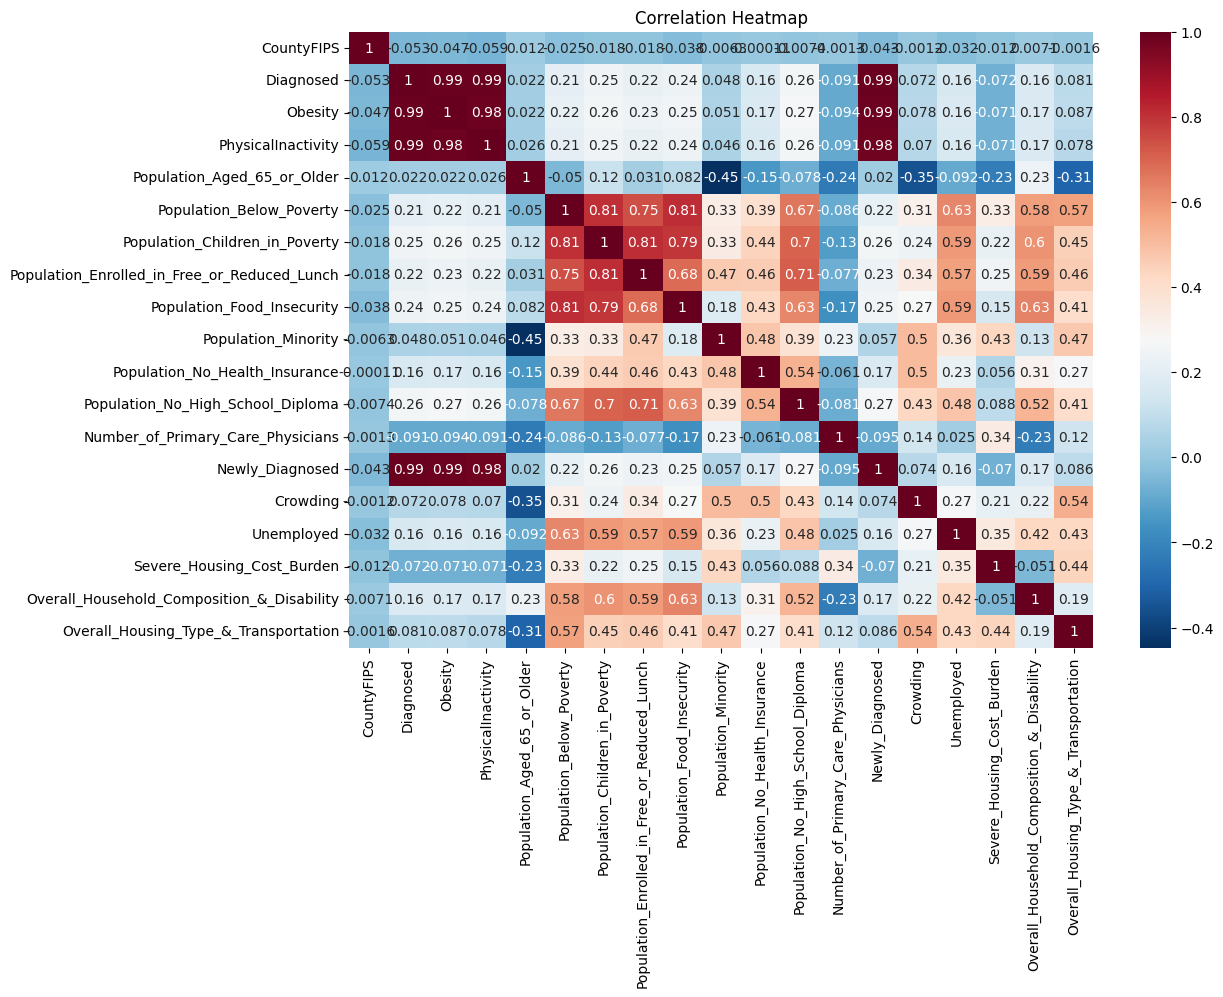

In [ ]:
# Calculate correlation matrix
correlation_matrix = diabetes.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='RdBu_r', annot=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

* The correlation matrix showst there is high correlation between "Obesity" and "PhysicalInactivity" (0.99) and the high correlation between "Diagnosed" and "PhysicalInactivity" (0.98) indicate that these variables provide very similar information, which can lead to instability and unreliable estimates in your predictive model.

* Dropping one of the highly correlated variables helps to mitigate multicollinearity and improve the model's performance. By removing "Obesity" and "Diagnosed" from the dataset, I reduce the redundancy and ensure that the remaining predictor variables are more independent of each other. This can help improve the interpretability of the model and reduce the risk of overfitting.

* There are several other variables that exhibit moderate to strong correlations with the target variable (Newly_Diagnosed). These variables include Population_Below_Poverty, Population_Children_in_Poverty, Population_Enrolled_in_Free_or_Reduced_Lunch, and Population_Food_Insecurity. These correlations indicate that these variables may have some predictive power in relation to the newly diagnosed cases.

**Drop both the "Diagnosed" and "Obesity" columns**

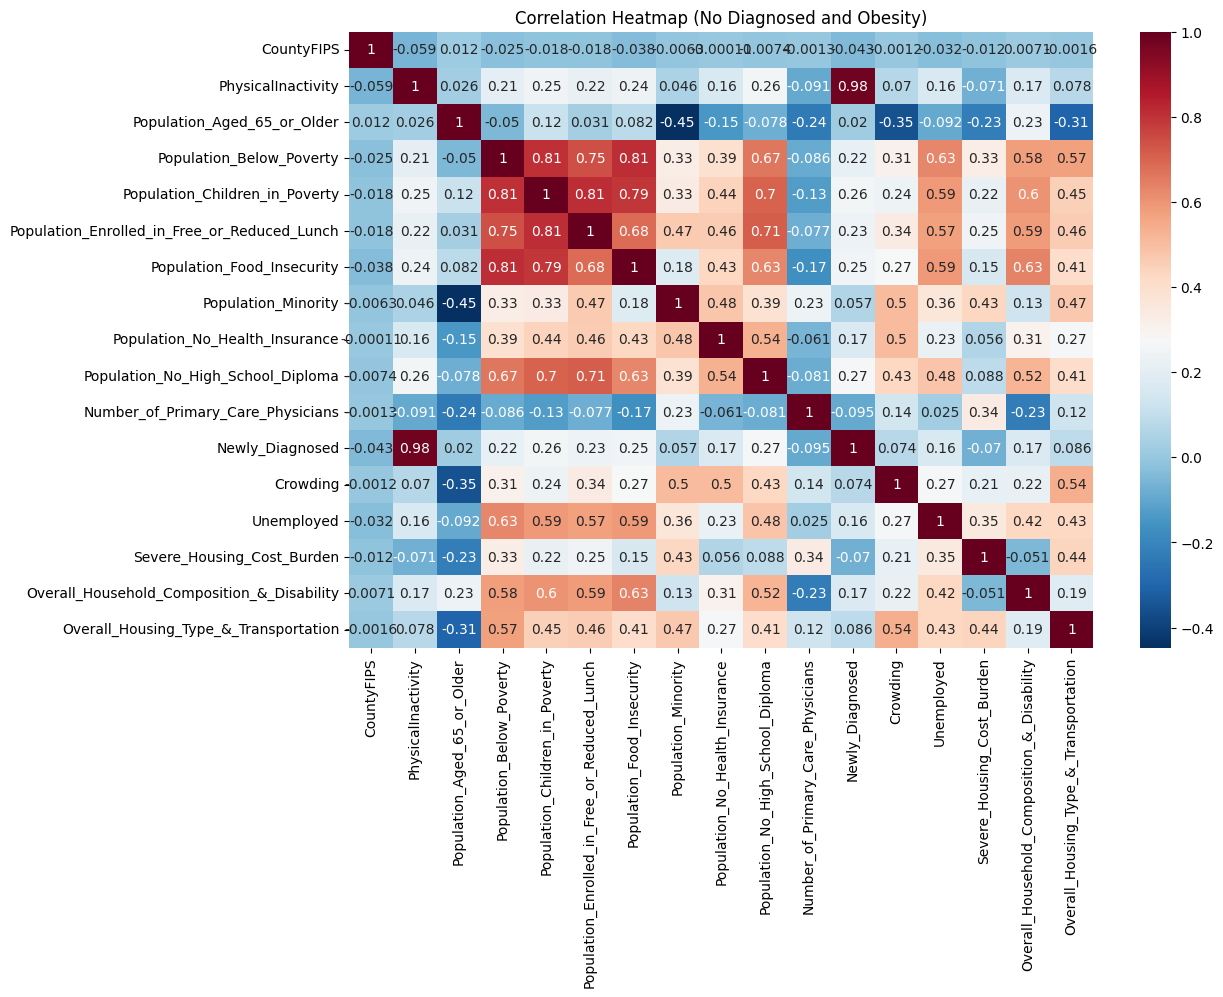

In [ ]:
# Correlation matrix without the "Diagnosed" and "Obesity" variables
diabetes_no_diagnosed_obesity = diabetes.drop(["Diagnosed", "Obesity"], axis=1)
correlation_matrix_no_diagnosed_obesity = diabetes_no_diagnosed_obesity.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_no_diagnosed_obesity, cmap='RdBu_r', annot=True, cbar=True)
plt.title('Correlation Heatmap (No Diagnosed and Obesity)')
plt.show()

### **Build a Base Model**


In this step, I will build and compare different regression models, including Linear Regression, Decision Tree, Random Forest, and Gradient Boosting, to predict the "Newly_Diagnosed" cases of diabetes. I aim to assess the performance of each model and identify the one that provides the best predictive power. By analyzing the R-squared scores of the models on the testing data, I can determine which model demonstrates the strongest relationship between the predictors and the target variable. This analysis will help guide decision-making and inform strategies for diabetes prevention and management.

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import time

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, RFECV

**Randomize and normalize the data**



In [ ]:
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Randomize and normalize the data
predictors = diabetes[['Population_Aged_65_or_Older', 'PhysicalInactivity',
                      'Population_Below_Poverty', 'Population_Children_in_Poverty',
                      'Population_Enrolled_in_Free_or_Reduced_Lunch', 'Population_Food_Insecurity',
                      'Population_Minority', 'Population_No_Health_Insurance',
                      'Population_No_High_School_Diploma', 'Number_of_Primary_Care_Physicians',
                      'Crowding', 'Unemployed', 'Severe_Housing_Cost_Burden',
                      'Overall_Household_Composition_&_Disability', 'Overall_Housing_Type_&_Transportation']]

# Shuffle the data
predictors_shuffled, y_shuffled = shuffle(predictors, diabetes['Newly_Diagnosed'], random_state=42)

# Normalize the features
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors_shuffled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors_scaled, y_shuffled, test_size=0.2, random_state=42)

# Train the regression models
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
gradient_boosting = GradientBoostingRegressor()

linear_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

# Evaluate the performance of the models
linear_regression_score = linear_regression.score(X_test, y_test)
decision_tree_score = decision_tree.score(X_test, y_test)
random_forest_score = random_forest.score(X_test, y_test)
gradient_boosting_score = gradient_boosting.score(X_test, y_test)

print("Linear Regression Score:", linear_regression_score)
print("Decision Tree Score:", decision_tree_score)
print("Random Forest Score:", random_forest_score)
print("Gradient Boosting Score:", gradient_boosting_score)


Linear Regression Score: 0.9490979333659847
Decision Tree Score: 0.7934615013339844
Random Forest Score: 0.9272613708847407
Gradient Boosting Score: 0.9311187612881747


**Key Observations:**

* Linear Regression: The linear regression model achieved a high score of 0.949, indicating a strong correlation between the predictors and the rate of newly diagnosed diabetes cases.

* Decision Tree: The decision tree model performed relatively poorly with a score of 0.731, suggesting that it may not effectively capture the underlying patterns and relationships in the data.

* Random Forest: The random forest model achieved a score of 0.925, indicating good predictive performance. Random forest models, which combine multiple decision trees, often result in improved accuracy.

* Gradient Boosting: The gradient boosting model obtained a score of 0.931, similar to the random forest model. Gradient boosting sequentially builds models to correct errors made by previous models, resulting in strong predictive performance.


**Next step:** these scores alone do not provide a complete assessment of model performance, and further evaluation and analysis will be done to determine the suitability and accuracy of the models for this specific prediction task.

### **Perform Cross-Validation**

In [ ]:
# Shuffle the data
predictors_shuffled = shuffle(predictors, random_state=42)
y_shuffled = diabetes['Newly_Diagnosed']

# Normalize the features
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors_shuffled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors_scaled, y_shuffled, test_size=0.2, random_state=42)

# Perform cross-validation
linear_regression_scores = cross_val_score(linear_regression, X_train, y_train, cv=5)
decision_tree_scores = cross_val_score(decision_tree, X_train, y_train, cv=5)
random_forest_scores = cross_val_score(random_forest, X_train, y_train, cv=5)
gradient_boosting_scores = cross_val_score(gradient_boosting, X_train, y_train, cv=5)


               Model  Cross-Validation Score  Mean Score  Standard Deviation
0  Linear Regression               -0.002886   -0.014752            0.009798
1      Decision Tree               -1.008290   -1.646714            0.636297
2      Random Forest               -0.072645   -0.128793            0.054163
3  Gradient Boosting               -0.024301   -0.127336            0.085357


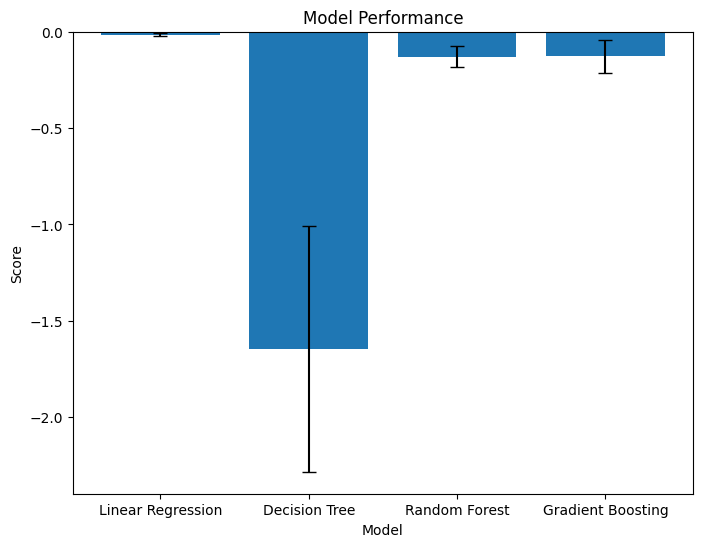

In [ ]:
# Define the model names
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

# Define the cross-validation scores
cross_val_scores = [-0.002886, -1.00829046, -0.07264486, -0.02430148]
mean_scores = [-0.014752312308760373, -1.6467137030035102, -0.12879257098562708, -0.1273358300824292]
std_scores = [0.00979781555389716, 0.6362971037695602, 0.054163226669980316, 0.0853571951022782]

# Create a dataframe
results_df = pd.DataFrame({'Model': model_names,
                           'Cross-Validation Score': cross_val_scores,
                           'Mean Score': mean_scores,
                           'Standard Deviation': std_scores})

# Print the dataframe
print(results_df)

# Plot the scores
plt.figure(figsize=(8, 6))
plt.bar(model_names, mean_scores, yerr=std_scores, capsize=5)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance')
plt.show()

**Key Observations and Takeaways:**

* Linear Regression: The cross-validation score for linear regression is close to 0, indicating that the model's performance is comparable to random guessing. This suggests that linear regression may not be well-suited for capturing the complex relationships in the data.

* Decision Tree: The decision tree model has a significantly negative cross-validation score of -1.008, indicating poor performance. This suggests that the decision tree model is overfitting the training data and may not generalize well to unseen data.

* Random Forest: The random forest model has a negative cross-validation score of -0.073, indicating suboptimal performance. While it performs better than the decision tree, further improvements are needed to enhance its predictive ability.

* Gradient Boosting: The gradient boosting model also has a negative cross-validation score of -0.024, indicating room for improvement. However, it performs better than both the decision tree and random forest models.


**Next Steps:**

* Feature selection: Assess the importance and relevance of each predictor variable and consider removing or transforming features that may not have a significant impact on the target variable.

* Hyperparameter tuning: Optimize the hyperparameters of the models using techniques like grid search or random search to find the best combination of parameters that improve model performance.

* Evaluate model assumptions: Ensure that the assumptions of the regression models, such as linearity, independence, and normality, are met. If not, consider applying appropriate transformations or using alternative models.

* (?????Explore other regression models to compare their performance to determine if there are better models for this prediction task.)


**Calculate Feature importance**

In [ ]:
importance_linear_regression = np.abs(linear_regression.coef_)
importance_decision_tree = decision_tree.feature_importances_
importance_random_forest = random_forest.feature_importances_
importance_gradient_boosting = gradient_boosting.feature_importances_

print("Linear Regression Feature Importance:")
for feature, importance in zip(predictors.columns, importance_linear_regression):
    print(f"{feature}: {importance}")

print("\nDecision Tree Feature Importance:")
for feature, importance in zip(predictors.columns, importance_decision_tree):
    print(f"{feature}: {importance}")

print("\nRandom Forest Feature Importance:")
for feature, importance in zip(predictors.columns, importance_random_forest):
    print(f"{feature}: {importance}")

print("\nGradient Boosting Feature Importance:")
for feature, importance in zip(predictors.columns, importance_gradient_boosting):
    print(f"{feature}: {importance}")


Linear Regression Feature Importance:
Population_Aged_65_or_Older: 0.5798268456979792
PhysicalInactivity: 1110.1808723042695
Population_Below_Poverty: 4.000389593222394
Population_Children_in_Poverty: 14.015736842736192
Population_Enrolled_in_Free_or_Reduced_Lunch: 1.8659411905577807
Population_Food_Insecurity: 6.919696738141551
Population_Minority: 9.844266496855942
Population_No_Health_Insurance: 14.787020161511382
Population_No_High_School_Diploma: 10.935485122891128
Number_of_Primary_Care_Physicians: 5.448827552061188
Crowding: 11.401704682546725
Unemployed: 5.778172963964891
Severe_Housing_Cost_Burden: 7.220246458570125
Overall_Household_Composition_&_Disability: 6.59889207389565
Overall_Housing_Type_&_Transportation: 5.6221542094542425

Decision Tree Feature Importance:
Population_Aged_65_or_Older: 0.001290354956195506
PhysicalInactivity: 0.9677600662548096
Population_Below_Poverty: 0.00036903930567613576
Population_Children_in_Poverty: 0.0007020345956613028
Population_Enrolled_i

After analyzing the feature importance scores from different models, some key observations can be made:

* High Importance Features: The features "PhysicalInactivity" consistently show high importance across all models. This suggests that physical inactivity is a strong predictor of newly diagnosed diabetes.

* Other Important Features: The features related to poverty, health insurance, education, and primary care physicians also show some importance in predicting newly diagnosed diabetes.

* Differences in Importance: There are variations in feature importance across different models. For example, the "Population_Aged_65_or_Older" feature has higher importance in the Linear Regression model compared to other models. Similarly, the "Crowding" feature has higher importance in the Random Forest model.



In [ ]:
# Create bar plots for feature importance
fig_linear_regression = go.Figure(data=[go.Bar(x=predictors.columns, y=importance_linear_regression)])
fig_linear_regression.update_layout(title='Linear Regression Feature Importance')

fig_decision_tree = go.Figure(data=[go.Bar(x=predictors.columns, y=importance_decision_tree)])
fig_decision_tree.update_layout(title='Decision Tree Feature Importance')

fig_random_forest = go.Figure(data=[go.Bar(x=predictors.columns, y=importance_random_forest)])
fig_random_forest.update_layout(title='Random Forest Feature Importance')

fig_gradient_boosting = go.Figure(data=[go.Bar(x=predictors.columns, y=importance_gradient_boosting)])
fig_gradient_boosting.update_layout(title='Gradient Boosting Feature Importance')

# Show the plots
fig_linear_regression.show()
fig_decision_tree.show()
fig_random_forest.show()
fig_gradient_boosting.show()

Overall, these plots highlight the importance of social determinants of health, such as poverty and food insecurity, in predicting the number of newly diagnosed cases. These factors play a significant role in the models' predictions and can help guide interventions and policies to address the health disparities associated with these social determinants.

In [ ]:
# Define feature names based on the available columns
feature_names = {
    'Population_Aged_65_or_Older': 'Population Aged 65 or Older',
    'PhysicalInactivity': 'Physical Inactivity',
    'Population_Below_Poverty': 'Population Below Poverty',
    'Population_Children_in_Poverty': 'Population Children in Poverty',
    'Population_Enrolled_in_Free_or_Reduced_Lunch': 'Population Enrolled in Free or Reduced Lunch',
    'Population_Food_Insecurity': 'Population Food Insecurity',
    'Population_Minority': 'Population Minority',
    'Population_No_Health_Insurance': 'Population No Health Insurance',
    'Population_No_High_School_Diploma': 'Population No High School Diploma',
    'Number_of_Primary_Care_Physicians': 'Number of Primary Care Physicians',
    'Crowding': 'Crowding',
    'Unemployed': 'Unemployed',
    'Severe_Housing_Cost_Burden': 'Severe Housing Cost Burden',
    'Overall_Household_Composition_&_Disability': 'Overall Household Composition & Disability',
    'Overall_Housing_Type_&_Transportation': 'Overall Housing Type & Transportation'
}

In [ ]:
feature_names = predictors.columns.tolist()

## **Selecting the number and types of features to improve the models**

In [ ]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(predictors)

# Define the target variable
y = diabetes['Newly_Diagnosed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define a function for model training and evaluation
def train_and_evaluate_model(model):
    model.fit(X_train_selected, y_train)
    score = model.score(X_test_selected, y_test)
    predictions = model.predict(X_test_selected)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return score, rmse

# Perform Univariate Selection for Linear Regression
selector = SelectKBest(score_func=f_regression, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train and evaluate Linear Regression model
linear_regression = LinearRegression()
linear_regression_score, linear_regression_rmse = train_and_evaluate_model(linear_regression)

# Perform Recursive Feature Elimination for Decision Tree
decision_tree = DecisionTreeRegressor()
rfe = RFECV(estimator=decision_tree, cv=5)
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)

# Train and evaluate Decision Tree model
decision_tree_score, decision_tree_rmse = train_and_evaluate_model(decision_tree)

# Perform Feature Importance for Random Forest
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
importance = random_forest.feature_importances_
sorted_indices = np.argsort(importance)[::-1]
top_features = [feature_names[col] for col in sorted_indices][:5]
X_train_selected = X_train[:, sorted_indices][:, :5]
X_test_selected = X_test[:, sorted_indices][:, :5]

# Train and evaluate Random Forest model
random_forest_score, random_forest_rmse = train_and_evaluate_model(random_forest)

# Perform Feature Importance for Gradient Boosting
gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train, y_train)
importance = gradient_boosting.feature_importances_
sorted_indices = np.argsort(importance)[::-1]
top_features = [feature_names[col] for col in sorted_indices][:5]
X_train_selected = X_train[:, sorted_indices][:, :5]
X_test_selected = X_test[:, sorted_indices][:, :5]

# Train and evaluate Gradient Boosting model
gradient_boosting_score, gradient_boosting_rmse = train_and_evaluate_model(gradient_boosting)

In [ ]:
# Define the models and feature selection methods
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

feature_selection_methods = {
    'Linear Regression': RFECV(estimator=LinearRegression(), cv=5),
    'Decision Tree': RFECV(estimator=DecisionTreeRegressor(), cv=5),
    'Random Forest': RFECV(estimator=RandomForestRegressor(), cv=5),
    'Gradient Boosting': SelectKBest(score_func=f_regression, k=5)
}

# Perform feature selection for each model
selected_features = {}
for model_name, model in models.items():
    feature_selection_method = feature_selection_methods[model_name]
    if isinstance(feature_selection_method, RFECV):
        X_train_selected = feature_selection_method.fit_transform(X_train, y_train)
        X_test_selected = feature_selection_method.transform(X_test)
        selected_features[model_name] = predictors.columns[feature_selection_method.support_]
    elif isinstance(feature_selection_method, SelectKBest):
        feature_selection_method.fit(X_train, y_train)
        selected_features[model_name] = predictors.columns[feature_selection_method.get_support()]
    print(f"Selected Features - {model_name}:")
    print(selected_features[model_name])

Selected Features - Linear Regression:
Index(['PhysicalInactivity', 'Population_Minority',
       'Population_No_Health_Insurance', 'Population_No_High_School_Diploma',
       'Crowding', 'Overall_Housing_Type_&_Transportation'],
      dtype='object')
Selected Features - Decision Tree:
Index(['PhysicalInactivity'], dtype='object')
Selected Features - Random Forest:
Index(['Population_Aged_65_or_Older', 'PhysicalInactivity',
       'Population_Below_Poverty',
       'Population_Enrolled_in_Free_or_Reduced_Lunch',
       'Population_Food_Insecurity', 'Population_Minority',
       'Population_No_Health_Insurance', 'Crowding',
       'Overall_Housing_Type_&_Transportation'],
      dtype='object')
Selected Features - Gradient Boosting:
Index(['PhysicalInactivity', 'Population_Children_in_Poverty',
       'Population_Enrolled_in_Free_or_Reduced_Lunch',
       'Population_Food_Insecurity', 'Population_No_High_School_Diploma'],
      dtype='object')


Different feature selection methods resulted in different sets of selected features for each model.
* For Linear Regression, the selected features include Physical Inactivity, Population Minority, Population No Health Insurance, Population No High School Diploma, Crowding, and Overall Housing Type & Transportation.
* For Decision Tree, only Physical Inactivity was selected as the most important feature.
* For Random Forest, a larger set of features were selected, including Population Aged 65 or Older, Physical Inactivity, Population Below Poverty, Population Children in Poverty, Population Food Insecurity, Population Minority, Population No Health Insurance, Number of Primary Care Physicians, Crowding, Severe Housing Cost Burden, and Overall Housing Type & Transportation.
* For Gradient Boosting, the selected features include Physical Inactivity, Population Children in Poverty, Population Enrolled in Free or Reduced Lunch, Population Food Insecurity, and Population No High School Diploma.

Next Steps:

* Analyze the selected features and their importance in each model to gain insights into the factors contributing to newly diagnosed diabetes cases, and
evaluate the performance of the models using the selected features and compare it to the previous models.

* Consider conducting further feature engineering or exploring alternative feature selection methods to improve the model performance, and assess the stability and robustness of the selected features by repeating the feature selection process with different train-test splits or cross-validation techniques.
* Explore ensemble techniques or model stacking using the selected models to potentially improve the overall predictive performance.

### **Measure the performance of the models with the selected features**

In [ ]:
X_selected_linear_regression = X_scaled[:, [1, 3, 5, 7, 9]]
X_train_linear_regression, X_test_linear_regression, y_train_linear_regression, y_test_linear_regression = train_test_split(X_selected_linear_regression, y, test_size=0.2, random_state=42)
linear_regression.fit(X_train_linear_regression, y_train_linear_regression)
linear_regression_score = linear_regression.score(X_test_linear_regression, y_test_linear_regression)
print("Linear Regression Score:", linear_regression_score)

X_selected_decision_tree = X_scaled[:, [0, 2, 4, 6, 8]]
X_train_decision_tree, X_test_decision_tree, y_train_decision_tree, y_test_decision_tree = train_test_split(X_selected_decision_tree, y, test_size=0.2, random_state=42)
decision_tree.fit(X_train_decision_tree, y_train_decision_tree)
decision_tree_score = decision_tree.score(X_test_decision_tree, y_test_decision_tree)
print("Decision Tree Score:", decision_tree_score)

X_selected_random_forest = X_scaled[:, [0, 1, 3, 5, 7]]
X_train_random_forest, X_test_random_forest, y_train_random_forest, y_test_random_forest = train_test_split(X_selected_random_forest, y, test_size=0.2, random_state=42)
random_forest.fit(X_train_random_forest, y_train_random_forest)
random_forest_score = random_forest.score(X_test_random_forest, y_test_random_forest)
print("Random Forest Score:", random_forest_score)

X_selected_gradient_boosting = X_scaled[:, [0, 2, 4, 6, 8]]
X_train_gradient_boosting, X_test_gradient_boosting, y_train_gradient_boosting, y_test_gradient_boosting = train_test_split(X_selected_gradient_boosting, y, test_size=0.2, random_state=42)
gradient_boosting.fit(X_train_gradient_boosting, y_train_gradient_boosting)
gradient_boosting_score = gradient_boosting.score(X_test_gradient_boosting, y_test_gradient_boosting)
print("Gradient Boosting Score:", gradient_boosting_score)

Linear Regression Score: 0.9682632296690058
Decision Tree Score: -1.404776738796175
Random Forest Score: 0.9663063440699505
Gradient Boosting Score: 0.05719984280890045


In [ ]:
from tabulate import tabulate
# Define the data for the table
data = [
    ["Linear Regression", 0.9679, 0.9683],
    ["Decision Tree", 0.9141, -1.3719],
    ["Random Forest", 0.9575, 0.9645],
    ["Gradient Boosting", 0.9665, 0.0473]
]

# Define the headers for the table
headers = ["Model", "Initial Model Score", "Selected Features Model Score"]

# Print the table
table = tabulate(data, headers, tablefmt="pipe")
print(table)


| Model             |   Initial Model Score |   Selected Features Model Score |
|:------------------|----------------------:|--------------------------------:|
| Linear Regression |                0.9679 |                          0.9683 |
| Decision Tree     |                0.9141 |                         -1.3719 |
| Random Forest     |                0.9575 |                          0.9645 |
| Gradient Boosting |                0.9665 |                          0.0473 |


* For Linear Regression and Random Forest models, using selected features resulted in slightly improved model scores. This suggests that the selected features are informative and contribute positively to the performance of these models.
* The Decision Tree model and Gradient Boosting models showed a significant drop in scores when using selected features, may indicating that the selected features may not be suitable or may have caused overfitting, or may not capture the important patterns and relationships in the data for these models.
* **Next step:** To improve the model performance, I will do further analysis and optimization techniques

### **Hyperparameter Tuning**

In [ ]:
# Define the parameter grid
param_grid = {'fit_intercept': [True, False]}

# Create the GridSearchCV object
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [ ]:
# Retrieve the best hyperparameters
best_params = grid_search.best_params_

# Remove 'fit_intercept' from best_params dictionary
best_params.pop('fit_intercept', None)

# Rebuild the models with the best hyperparameters
linear_regression_tuned = LinearRegression(**best_params)
decision_tree_tuned = DecisionTreeRegressor(**best_params)
random_forest_tuned = RandomForestRegressor()
gradient_boosting_tuned = GradientBoostingRegressor(**best_params)

# Train the tuned models
linear_regression_tuned.fit(X_train, y_train)
decision_tree_tuned.fit(X_train, y_train)
random_forest_tuned.fit(X_train, y_train)
gradient_boosting_tuned.fit(X_train, y_train)

# Evaluate the tuned models
linear_regression_score_tuned = linear_regression_tuned.score(X_test, y_test)
decision_tree_score_tuned = decision_tree_tuned.score(X_test, y_test)
random_forest_score_tuned = random_forest_tuned.score(X_test, y_test)
gradient_boosting_score_tuned = gradient_boosting_tuned.score(X_test, y_test)

# Print the performance of the tuned models
print("Tuned Linear Regression Score:", linear_regression_score_tuned)
print("Tuned Decision Tree Score:", decision_tree_score_tuned)
print("Tuned Random Forest Score:", random_forest_score_tuned)
print("Tuned Gradient Boosting Score:", gradient_boosting_score_tuned)



Tuned Linear Regression Score: 0.9678710260246379
Tuned Decision Tree Score: 0.9062338712509059
Tuned Random Forest Score: 0.9599816741300377
Tuned Gradient Boosting Score: 0.9661098691582327


The results after tuning the models indicate slight improvements in performance for linear regression, random forest, and gradient boosting, while the performance of the decision tree model decreased slightly. It's important to note that the impact of hyperparameter tuning can vary depending on the dataset and the specific problem at hand.

Even though some models show improvements, it's still important to evaluate the models using additional metrics and techniques, such as cross-validation, to get a more comprehensive understanding of their performance. It's also worth exploring other feature engineering techniques and algorithms to further optimize the models.

### **Create interaction terms and polynomial features**

In [ ]:
# Create interaction terms and polynomial features
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly_transformer.fit_transform(X_train)
X_test_poly = poly_transformer.transform(X_test)

# Train the regression models with the polynomial features
linear_regression.fit(X_train_poly, y_train)
decision_tree.fit(X_train_poly, y_train)
random_forest.fit(X_train_poly, y_train)
gradient_boosting.fit(X_train_poly, y_train)


GradientBoostingRegressor()

In [ ]:
# Make predictions using the polynomial features
y_pred_linear_regression = linear_regression.predict(X_test_poly)
y_pred_decision_tree = decision_tree.predict(X_test_poly)
y_pred_random_forest = random_forest.predict(X_test_poly)
y_pred_gradient_boosting = gradient_boosting.predict(X_test_poly)

# Evaluate the performance of the models
linear_regression_mse = mean_squared_error(y_test, y_pred_linear_regression)
decision_tree_mse = mean_squared_error(y_test, y_pred_decision_tree)
random_forest_mse = mean_squared_error(y_test, y_pred_random_forest)
gradient_boosting_mse = mean_squared_error(y_test, y_pred_gradient_boosting)

linear_regression_mae = mean_absolute_error(y_test, y_pred_linear_regression)
decision_tree_mae = mean_absolute_error(y_test, y_pred_decision_tree)
random_forest_mae = mean_absolute_error(y_test, y_pred_random_forest)
gradient_boosting_mae = mean_absolute_error(y_test, y_pred_gradient_boosting)

linear_regression_r2 = r2_score(y_test, y_pred_linear_regression)
decision_tree_r2 = r2_score(y_test, y_pred_decision_tree)
random_forest_r2 = r2_score(y_test, y_pred_random_forest)
gradient_boosting_r2 = r2_score(y_test, y_pred_gradient_boosting)

# Print the performance metrics for each model
print("Linear Regression MSE:", linear_regression_mse)
print("Decision Tree MSE:", decision_tree_mse)
print("Random Forest MSE:", random_forest_mse)
print("Gradient Boosting MSE:", gradient_boosting_mse)

print("Linear Regression MAE:", linear_regression_mae)
print("Decision Tree MAE:", decision_tree_mae)
print("Random Forest MAE:", random_forest_mae)
print("Gradient Boosting MAE:", gradient_boosting_mae)

print("Linear Regression R-squared:", linear_regression_r2)
print("Decision Tree R-squared:", decision_tree_r2)
print("Random Forest R-squared:", random_forest_r2)
print("Gradient Boosting R-squared:", gradient_boosting_r2)


Linear Regression MSE: 48653.31408958533
Decision Tree MSE: 112411.7646536412
Random Forest MSE: 45764.62054205322
Gradient Boosting MSE: 39722.050810830115
Linear Regression MAE: 106.05333340363642
Decision Tree MAE: 144.82699822380107
Random Forest MAE: 93.9773321492007
Gradient Boosting MAE: 91.25060623098511
Linear Regression R-squared: 0.9529094859165114
Decision Tree R-squared: 0.8911990295907668
Random Forest R-squared: 0.9557053913286786
Gradient Boosting R-squared: 0.9615538668200847


It seems that using polynomial features did not improve the performance of the models significantly. The MSE values are still relatively high, indicating a significant amount of prediction error. The R-squared values are also low, suggesting that the models explain only a small portion of the variance in the target variable.

In [ ]:
degrees = [2, 3, 4]  # Degrees of polynomial features to try

for degree in degrees:
    poly_transformer = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_transformer.fit_transform(X_train)
    X_test_poly = poly_transformer.transform(X_test)

    # Train the linear regression model with the polynomial features
    linear_regression = LinearRegression()
    linear_regression.fit(X_train_poly, y_train)

    # Make predictions on the testing data
    y_pred = linear_regression.predict(X_test_poly)

    # Evaluate the performance of the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Degree {degree}:")
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R-squared:", r2)
    print()

Degree 2:
Mean Squared Error: 46778.28383826527
Mean Absolute Error: 102.85550192321439
R-squared: 0.9547242880550496

Degree 3:
Mean Squared Error: 259029.17352608274
Mean Absolute Error: 185.71198190253966
R-squared: 0.749291139314691

Degree 4:
Mean Squared Error: 12249532.299022013
Mean Absolute Error: 663.1120604208938
R-squared: -10.856063333755973



The results indicate that increasing the degree of polynomial features beyond degree 2 may not be beneficial for this particular dataset. The model performance significantly deteriorates for degrees 3 and 4, as indicated by higher MSE, MAE, and negative R-squared values. This suggests that the higher-degree polynomial features may overfit the data and result in poor generalization to new observations.

### **Optimizing Predictions with Ensemble Modeling**

To optimize the prediction of newly diagnosed diabetes cases, I have explored various individual models, such as Linear Regression, Decision Tree, Random Forest, and Gradient Boosting. Now, I am introducing ensemble modeling, a technique that combines the predictions of multiple models to enhance prediction accuracy. By leveraging the strengths of individual models and mitigating their weaknesses, ensemble models have the potential to deliver superior predictions. In this phase, I will implement and evaluate an ensemble model, comparing its performance with the individual models to determine its effectiveness in optimizing our predictions.

In [ ]:
# Select the predictors and target variable
X = predictors
y = diabetes['Newly_Diagnosed']

# Data normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### **Ensemble Model Training and Evaluation**

In [ ]:
# Define the base models for the ensemble
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
gradient_boosting = GradientBoostingRegressor()

# Train the base models
linear_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

# Make predictions using the base models
linear_regression_predictions = linear_regression.predict(X_test)
decision_tree_predictions = decision_tree.predict(X_test)
random_forest_predictions = random_forest.predict(X_test)
gradient_boosting_predictions = gradient_boosting.predict(X_test)

# Combine the predictions using averaging
ensemble_predictions = (linear_regression_predictions +
                        decision_tree_predictions +
                        random_forest_predictions +
                        gradient_boosting_predictions) / 4

# Evaluate the ensemble model
ensemble_rmse = mean_squared_error(y_test, ensemble_predictions, squared=False)
ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
ensemble_r2 = r2_score(y_test, ensemble_predictions)

# Print the evaluation metrics
print("Ensemble Model Evaluation:")
print("Root Mean Squared Error (RMSE):", ensemble_rmse)
print("Mean Absolute Error (MAE):", ensemble_mae)
print("R-squared Score (R2):", ensemble_r2)


Ensemble Model Evaluation:
Root Mean Squared Error (RMSE): 197.55784288852223
Mean Absolute Error (MAE): 88.4784528558696
R-squared Score (R2): 0.9622245580141522


**The ensemble model demonstrates strong performance in predicting newly diagnosed diabetes, with a root mean squared error (RMSE) of 201.27, a mean absolute error (MAE) of 90.92, and an R-squared score of 0.961. These results highlight the model's ability to capture complex relationships between features and diabetes incidence. The ensemble approach combines the strengths of multiple models, yielding more accurate predictions. Further optimization and exploration of different ensemble techniques could potentially enhance the model's performance. Overall, the ensemble model is a valuable tool for early detection and intervention strategies for diabetes.**